KODEX_200.pkl - 코스피 지수를 추종하는 KODEX 200 ETF 상품의 일별 가격데이터 입니다.

KODEX_10Y_KTB.pkl - 10년국채선물지수의 변동률을 따라 가격이 변동하는 KODEX 국채선물10년 ETF 상품의 일별 가격데이터 입니다.
(http://blog.alphasquare.co.kr/221602425951?fbclid=IwAR1lAPJ50LyNIM2bMcUZYphXtpQfagZCZkWc4DTcwAcX6e8hT9U4zPvLJgY 참고)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
# KODEX 200 ETF 가격 데이터를 읽어와 데이터 프레임에 저장합니다. 
kospi_df = pd.read_pickle('/content/drive/My Drive/Python/finance/KODEX_200.pkl') 
kospi_df.head()

,close,high,low,open,volume
dt,,,,,
2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50
2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00
2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50
2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50
2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25


In [6]:
# KODEX 국채선물10년 ETF 가격 데이터를 읽어와 데이터 프레임에 저장합니다. 
ktb_df = pd.read_pickle('/content/drive/My Drive/Python/finance/KODEX_10Y_KTB.pkl') 
ktb_df.head()

,close,high,low,open,volume
dt,,,,,
2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0
2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0
2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0
2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0


##기간 동안 수익률 계산 함수 만들기


정적 자산 배분 위주로 다루겠음. 보유 기간과 주식/채권 보유 비중을 입력하면 기간동안 수익률 곡선을 볼 수 있는 함수를 먼저 만들어 보겠습니다. 먼저 편리하게 수익률을 계산하기 위해 두 자산의 종가만 따로 저장해 줍니다.

In [7]:
close_df = pd.DataFrame({'kospi_close':kospi_df['close'], 'ktb_close': ktb_df['close']}) 
close_df.head()

,kospi_close,ktb_close
dt,,
2012-01-20,23197.4,49960.0
2012-01-25,23277.4,49960.0
2012-01-26,23299.6,49930.0
2012-01-27,23335.2,50000.0
2012-01-30,23073.0,50130.0


보유 기간과 주식/채권 보유 비중을 다음과 같이 설정해 줍니다


In [0]:
start_date = '2016-01-01' # 투자 시작일 
end_date = '2017-12-31' # 투자 종료일
kospi_weight = 0.5 # 코스피 보유비중 = 50 % 
ktb_weight = 0.5 # 채권 보유비중 = 50 %

앞으로 계산의 편의를 위해 해당 기간의 데이터만 잘라서 data라는 곳에 저장합니다.





In [9]:
data = close_df[start_date:end_date] 
data.head()

,kospi_close,ktb_close
dt,,
2016-01-04,22124.8,65050.0
2016-01-05,22263.9,64915.0
2016-01-06,22101.6,65015.0
2016-01-07,21892.9,65140.0
2016-01-08,22045.9,64975.0


자산별 기간동안 수익률은 아래와 같이 간단한 명령어를 통해 구할 수 있습니다.



In [10]:
pct_return = (data - data.iloc[0]) / data.iloc[0] 
pct_return.columns = ['KOSPI','KTB'] 
pct_return.head()

,KOSPI,KTB
dt,,
2016-01-04,0.000000,0.000000
2016-01-05,0.006287,-0.002075
2016-01-06,-0.001049,-0.000538
2016-01-07,-0.010481,0.001384
2016-01-08,-0.003566,-0.001153


코스피와 채권의 수익률을 따로 저장해 줍니다.


In [0]:
kospi_return = pct_return['KOSPI'] 
ktb_return = pct_return['KTB']

포트폴리오의 기간 수익률은 각 자산별 기간 수익률에 비중을 곱해서 더해 주어야 합니다. 아래와 같이 한줄의 코드로 간단하게 계산이 가능합니다.

In [0]:
portfolio_return = (pct_return * [kospi_weight, ktb_weight]).sum(axis=1)

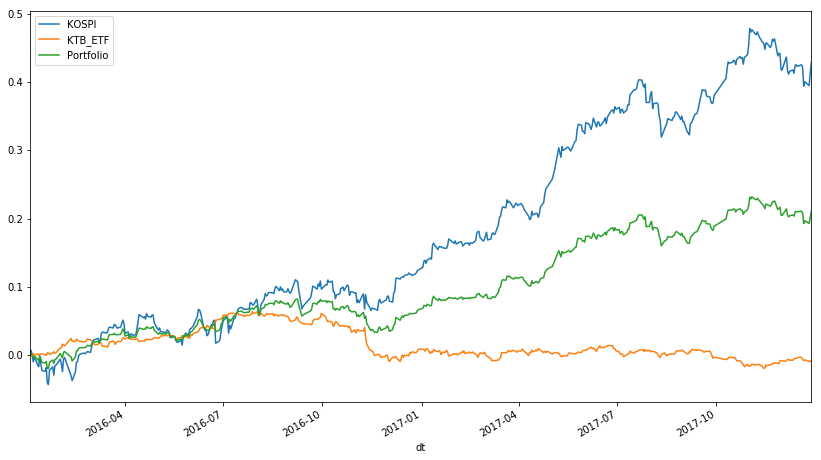

In [13]:
kospi_return.plot(label='KOSPI', figsize=(14,8)); 
ktb_return.plot(label='KTB_ETF'); 
portfolio_return.plot(label='Portfolio'); 
plt.legend();

초록색 선이 코스피와 채권에 5:5로 투자했을 때의 성과 입니다. 이제 위에서 했던 작업을 하나의 함수로 만들어 보도록 하겠습니다.


In [0]:
def get_port_return(start_date, end_date, kospi_weight, ktb_weight): 
  data = close_df[start_date:end_date] 
  pct_return = (data - data.iloc[0]) / data.iloc[0] 
  pct_return.columns = ['KOSPI','KTB'] 

  kospi_return = pct_return.iloc[:,0] 
  ktb_return = pct_return.iloc[:,1] 
  portfolio_return = (pct_return * [kospi_weight, ktb_weight]).sum(axis=1) 

  kospi_return.plot(label='KOSPI', figsize=(14,8)); 
  ktb_return.plot(label='KTB_ETF'); 
  portfolio_return.plot(label='Portfolio'); 

  plt.legend()


위에서 사용한 변수들을 입력하여 그래프가 똑같이 나오는지 확인해 보도록 합니다.



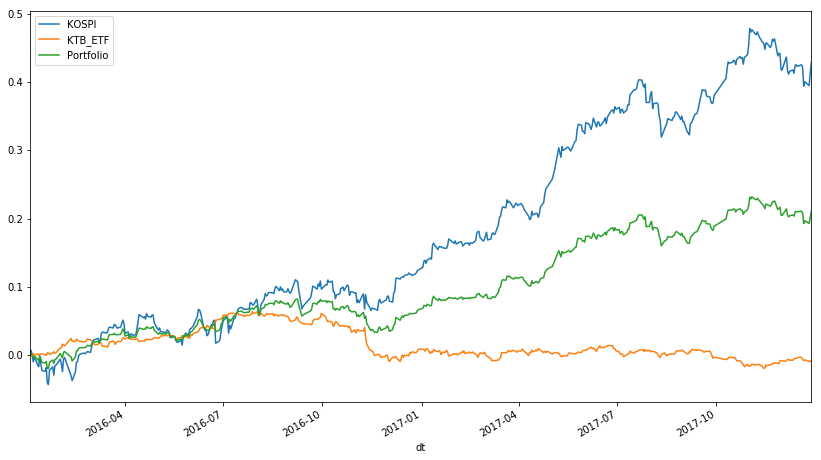

In [15]:
get_port_return(start_date, end_date, kospi_weight, ktb_weight)

날짜 변경도 물론 가능합니다.


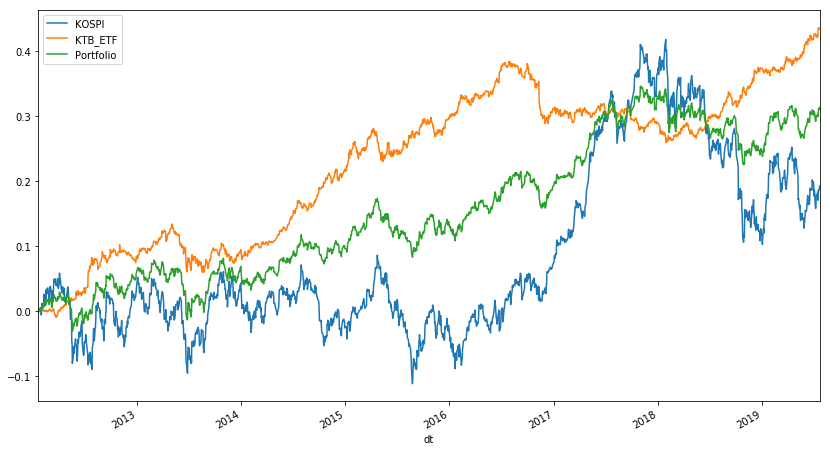

In [16]:
get_port_return('2012-01-20', '2019-07-23', 0.5, 0.5)